In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
#nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [2]:
weather_news = pd.read_csv("Unstructured_Data.csv", index_col=None, header=0)

In [3]:
weather_news

,title,date
0,Hurricane Dorian: Trump flies to golf club as ...,2019-09-01
1,Hurricane Dorian: where will the storm hit and...,2019-09-01
2,A chilling truth: our addiction to air conditi...,2019-09-01
3,Hurricane Dorian strengthens to category 4 as ...,2019-09-01
4,Floridians not fazed as Hurricane Dorian’s pat...,2019-09-01
5,Hurricane Dorian: millions evacuated from coas...,2019-09-02
6,Hurricane Dorian lashes Bahamas with ferocious...,2019-09-02
7,Hurricane Dorian: 'We're at the frontline of c...,2019-09-05
8,'Sharpiegate': Trump insists Dorian was foreca...,2019-09-05
9,'Everything is destroyed': 30 dead in Bahamas ...,2019-09-06


In [4]:
neg_string = []
for t in weather_news["title"]:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

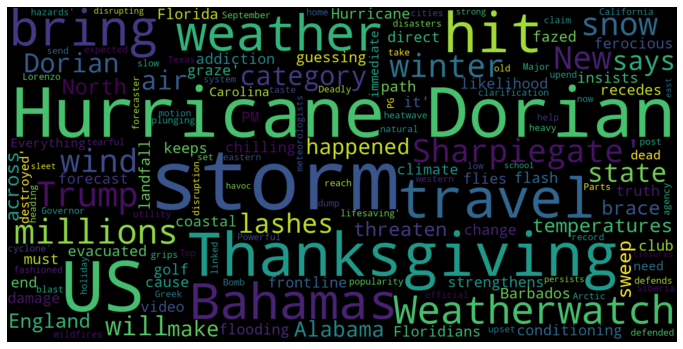

In [5]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [13]:
sia = SIA()
results = []

for line in weather_news['title']:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

In [14]:
results

[{'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': 'Hurricane Dorian: Trump flies to golf club as likelihood of direct hit recedes'},
 {'neg': 0.211,
  'neu': 0.789,
  'pos': 0.0,
  'compound': -0.4939,
  'headline': 'Hurricane Dorian: where will the storm hit and what damage will it bring?'},
 {'neg': 0.106,
  'neu': 0.673,
  'pos': 0.221,
  'compound': 0.296,
  'headline': 'A chilling truth: our addiction to air conditioning must end'},
 {'neg': 0.0,
  'neu': 0.75,
  'pos': 0.25,
  'compound': 0.4588,
  'headline': 'Hurricane Dorian strengthens to category 4 as Florida braces for landfall'},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': 'Floridians not fazed as Hurricane Dorian’s path keeps state guessing'},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': 'Hurricane Dorian: millions evacuated from coastal US as category 5 storm hits Bahamas'},
 {'neg': 0.123,
  'neu': 0.877,
  'pos': 0.0,
  'compound': -0

In [15]:
df = pd.DataFrame.from_records(results)
df.columns = ['compound', 'news_title','severe','moderate','mild']
df.head()

,compound,news_title,severe,moderate,mild
0,0.0000,Hurricane Dorian: Trump flies to golf club as ...,0.000,1.000,0.000
1,-0.4939,Hurricane Dorian: where will the storm hit and...,0.211,0.789,0.000
2,0.2960,A chilling truth: our addiction to air conditi...,0.106,0.673,0.221
3,0.4588,Hurricane Dorian strengthens to category 4 as ...,0.000,0.750,0.250
4,0.0000,Floridians not fazed as Hurricane Dorian’s pat...,0.000,1.000,0.000


In [16]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df

,compound,news_title,severe,moderate,mild,label
0,0.0000,Hurricane Dorian: Trump flies to golf club as ...,0.000,1.000,0.000,0
1,-0.4939,Hurricane Dorian: where will the storm hit and...,0.211,0.789,0.000,-1
2,0.2960,A chilling truth: our addiction to air conditi...,0.106,0.673,0.221,1
3,0.4588,Hurricane Dorian strengthens to category 4 as ...,0.000,0.750,0.250,1
4,0.0000,Floridians not fazed as Hurricane Dorian’s pat...,0.000,1.000,0.000,0
5,0.0000,Hurricane Dorian: millions evacuated from coas...,0.000,1.000,0.000,0
6,-0.1027,Hurricane Dorian lashes Bahamas with ferocious...,0.123,0.877,0.000,0
7,0.0000,Hurricane Dorian: 'We're at the frontline of c...,0.000,1.000,0.000,0
8,0.0000,'Sharpiegate': Trump insists Dorian was foreca...,0.000,1.000,0.000,0
9,-0.6486,'Everything is destroyed': 30 dead in Bahamas ...,0.281,0.719,0.000,-1


In [17]:
print("Mild news title:\n")
print(list(df[df['label'] == 1].news_title))

print("\nSevere news title:\n")
print(list(df[df['label'] == -1].news_title))

Mild news title:

['A chilling truth: our addiction to air conditioning must end', 'Hurricane Dorian strengthens to category 4 as Florida braces for landfall', "Hurricane Dorian: 70,000 in 'immediate need of lifesaving' help in Bahamas – as it happened", "Top weather official who defended 'Sharpiegate' makes tearful clarification", 'Weatherwatch: the popularity of the old-fashioned forecaster', 'Weatherwatch: winter storms and strong winds sweep US']

Severe news title:

['Hurricane Dorian: where will the storm hit and what damage will it bring?', "'Everything is destroyed': 30 dead in Bahamas as Dorian lashes North Carolina", "'Sharpiegate': meteorologists upset as weather agency defends Trump's Alabama claim", "Weatherwatch: why slow-motion natural disasters don't make the news", 'Major snow dump in western states brings taste of winter to September', 'Arctic blast grips eastern US as cities reach record low temperatures', 'Millions set for Thanksgiving disruption as storms sweep acr

In [11]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100)

 0    13
-1    10
 1     6
Name: label, dtype: int64
 0    44.827586
-1    34.482759
 1    20.689655
Name: label, dtype: float64


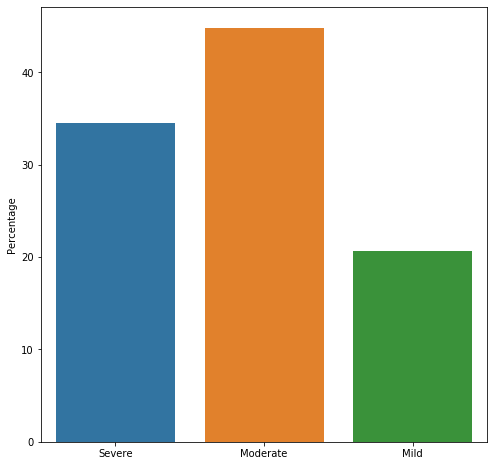

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Severe', 'Moderate', 'Mild'])
ax.set_ylabel("Percentage")

plt.show()